<a href="https://colab.research.google.com/github/ShuklaRajni/Airbnb-Booking-Analysis/blob/main/Airbnb_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT TITLE - AIRBNB BOOKING ANALYSIS**

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions,understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.</b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as :

* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>


In [2]:
#import the important library files to perform action on dataframes and for plotting graphs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns 
%matplotlib inline

In [3]:
#mounted the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#read the database file from mounted google drive into dataframe df
df = pd.read_csv('/content/drive/MyDrive/Airbnb Booking Analysis-Capstone 1/Airbnb NYC 2019.csv')

In [5]:
#Display first 5 rows of the dataframe to understand the information present in the database
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df_copy = df.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**From Above we come to know that 10 thousand reviews are not given or missing. Also few name and hostname are missing.**

In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**From above data we can say the average price of the room is around 153 and the average minimum nights stay is 7. Host listing count on a average is 7. Availabilty_365 : 113.**

## **Checked unique and Duplicates and missing values in the datasets**

In [10]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

**No of locations are 5 and Type of rooms are 3.**

In [11]:
df.duplicated().sum()

0

# **Missing value Management**

In [12]:
#drop unnecessary Columns
df.drop(['id','name','last_review'], axis=1, inplace=True)

In [13]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [14]:
# replace all NaN values in reviews_per_month by 0
df.reviews_per_month.fillna(0, inplace= True)
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [15]:
# replace all NaN values in host_name by 'no name'
df.host_name.fillna('No Name',inplace=True)
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [16]:
#checking for missing values 
df.isnull().any()

host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   host_name                       48895 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

**In normal situation price of the any property cannot be 0 therefore we will exclude the data having pricing 0".**

***Good!! now that we have dropped the null values lets take a look at some statistics about our data.***

In [18]:
df=df.loc[df['price']>0]
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# **Type of rooms preferred by the people**

In [19]:
#counting the type of rooms preferred by the people
df['room_type'].value_counts()

Entire home/apt    25407
Private room       22319
Shared room         1158
Name: room_type, dtype: int64

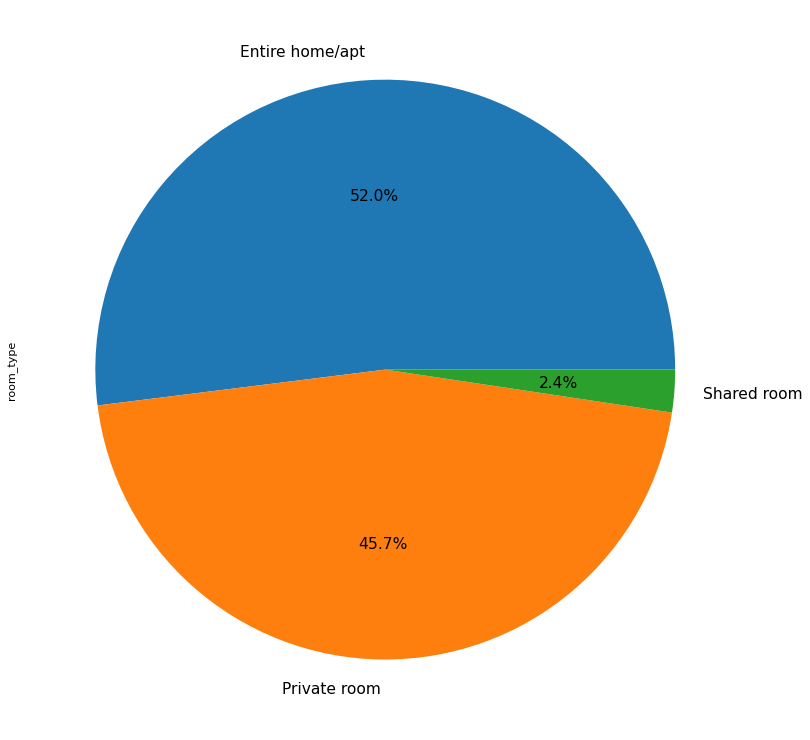

In [20]:
#plotting the types of room preferred by the people
plt.figure(figsize=(12,12), dpi=80)

df['room_type'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=360,fontsize=14 )

**From this graph we realise that customers prefer living in Apartment or private rooms instead of shared rooms.**

# **Plotting the distribution of Room Types in various Neighbourhood Groups** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


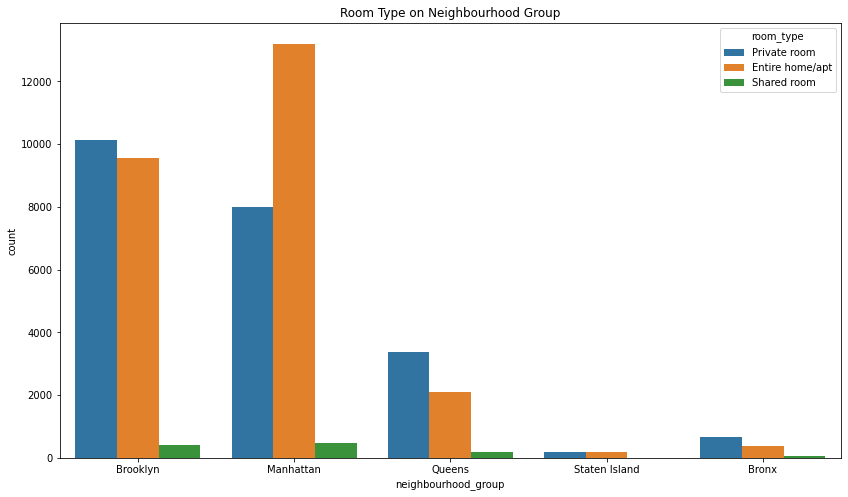

In [21]:
# Plotting the distribution of Room Types in various Neighbourhood Groups
plt.figure(figsize=(14,8))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(df.neighbourhood_group,hue=df.room_type)
plt.show()

**From the above data we come to know that Manhattan and Brooklyn	are favorite locations to visit.**

**Majority hosts in the Manhatan and Brooklyn provide either a Private room or Entire home/apt. If people are looking for future buissness in these areas Private room or Entire home/apt would be the best choice.**

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

<Figure size 1296x1296 with 0 Axes>

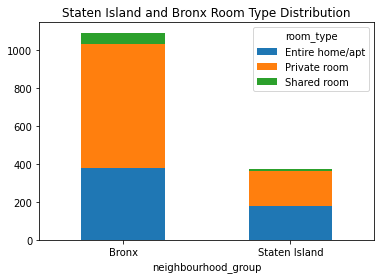

In [22]:
# Individual analysis of Staten Island and Bronx (since above plot doesnot give a readable number)
plt.figure(figsize=(18,18))
new_data_frame=df.groupby(['neighbourhood_group'])['room_type'].value_counts().unstack()
new_data_frame.iloc[0:5:4].plot(kind='bar', stacked=True)
plt.title('Staten Island and Bronx Room Type Distribution')
plt.xticks(rotation=360, ha='center')

# **Top 10 Highest Average Price Distribution of neighbourhood**

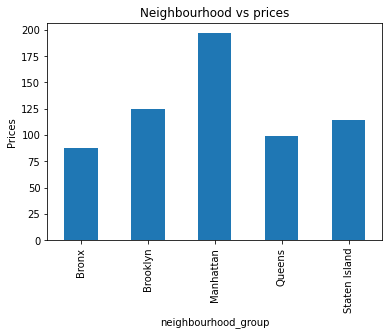

In [23]:
#Plotting the Graph Prics Vs Location
df.groupby(['neighbourhood_group']) ['price'].mean().plot(kind="bar", ylabel='Prices', title='Neighbourhood vs prices')


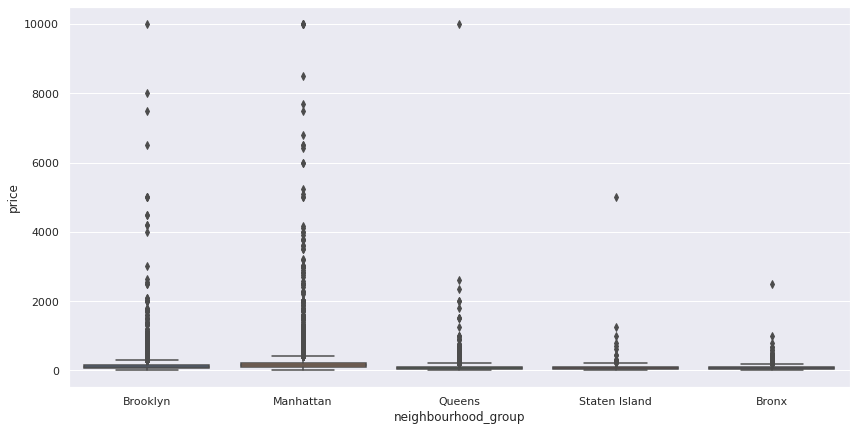

In [24]:
# Average Price Distribution of neighbourhood group
sns.set(rc={"figure.figsize":(14, 7)})
sns.boxplot(data=df, x=df['neighbourhood_group'], y=df['price'])

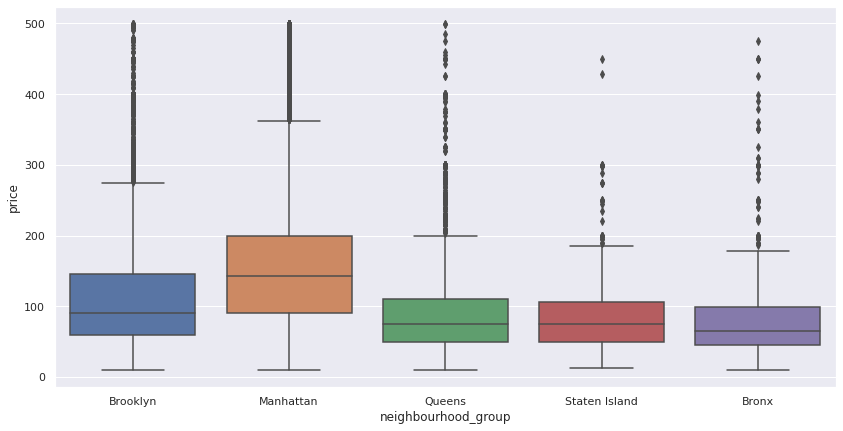

In [25]:
#  Creating a sub-dataframe with extreme values  less than 500 (To understand data that was not visible in the upper graph)
sub_df=df[df.price < 500]
sns.set(rc={"figure.figsize":(14, 7)})
sns.boxplot(data=sub_df, x=sub_df['neighbourhood_group'], y=sub_df['price'])

**Manhattan followed by Brooklyn have most expensive properties on an average  and Bronx is has cheapest among all.**

In [26]:
# Price Vs Location
df.price.describe()

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

**Average price of airbnb in newyork is 152 and maximum price is 10K.**

In [27]:
# Calculating Mean Price of the neighbourhood values
#df['neighbourhood'].value_counts().reset_index().rename(columns={"index": "neighbourhood", "neighbourhood": df['price'].mean()})
df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)
#df.groupby(['neighbourhood_group'])['room_type'].value_counts()

neighbourhood
Fort Wadsworth    800.000000
Woodrow           700.000000
Tribeca           490.638418
Sea Gate          487.857143
Riverdale         442.090909
                     ...    
New Dorp           57.000000
Soundview          53.466667
Tremont            51.545455
Hunts Point        50.500000
Bull's Head        47.333333
Name: price, Length: 221, dtype: float64

Text(0.5, 0, 'Average Price of Airbnb')

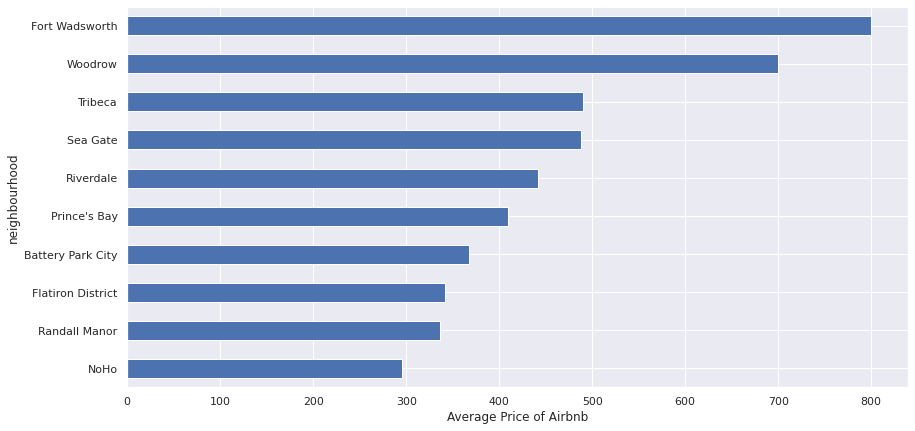

In [28]:
df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=True).tail(10).plot.barh()
plt.xlabel('Average Price of Airbnb')

In [29]:
# Finding neighbourhood_group for top 10 neighbourhoods
data=df.groupby(['neighbourhood','neighbourhood_group'])['price'].mean().sort_values(ascending=False)
data.head(10)

neighbourhood      neighbourhood_group
Fort Wadsworth     Staten Island          800.000000
Woodrow            Staten Island          700.000000
Tribeca            Manhattan              490.638418
Sea Gate           Brooklyn               487.857143
Riverdale          Bronx                  442.090909
Prince's Bay       Staten Island          409.500000
Battery Park City  Manhattan              367.557143
Flatiron District  Manhattan              341.925000
Randall Manor      Staten Island          336.000000
NoHo               Manhattan              295.717949
Name: price, dtype: float64

**From the above it is clear that the Fort Wadsworth of Staten Island group has the maximum average price of Airbnb.**

# **On an average for how many nights people stayed in each room_types?**

In [30]:
df.groupby(['neighbourhood_group'])['minimum_nights'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1090.0,4.563303,15.638775,1.0,1.0,2.0,3.0,365.0
Brooklyn,20095.0,6.055486,17.634895,1.0,2.0,3.0,5.0,999.0
Manhattan,21660.0,8.579409,24.051383,1.0,1.0,3.0,6.0,1250.0
Queens,5666.0,5.181433,15.028725,1.0,1.0,2.0,3.0,500.0
Staten Island,373.0,4.831099,19.727605,1.0,1.0,2.0,3.0,365.0


In [31]:
df.groupby(['room_type','neighbourhood_group'])['minimum_nights'].mean()

room_type        neighbourhood_group
Entire home/apt  Bronx                   5.957784
                 Brooklyn                6.531492
                 Manhattan              10.539855
                 Queens                  5.369752
                 Staten Island           6.238636
Private room     Bronx                   3.861751
                 Brooklyn                5.541675
                 Manhattan               5.446880
                 Queens                  5.120107
                 Staten Island           3.632979
Shared room      Bronx                   3.366667
                 Brooklyn                7.644769
                 Manhattan               6.766667
                 Queens                  4.232323
                 Staten Island           2.333333
Name: minimum_nights, dtype: float64

In [32]:
df.groupby(['room_type','neighbourhood_group'])['minimum_nights'].mean().unstack()

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,5.957784,6.531492,10.539855,5.369752,6.238636
Private room,3.861751,5.541675,5.446880,5.120107,3.632979
Shared room,3.366667,7.644769,6.766667,4.232323,2.333333


Text(0.5, 0, 'Average of minimun_nights')

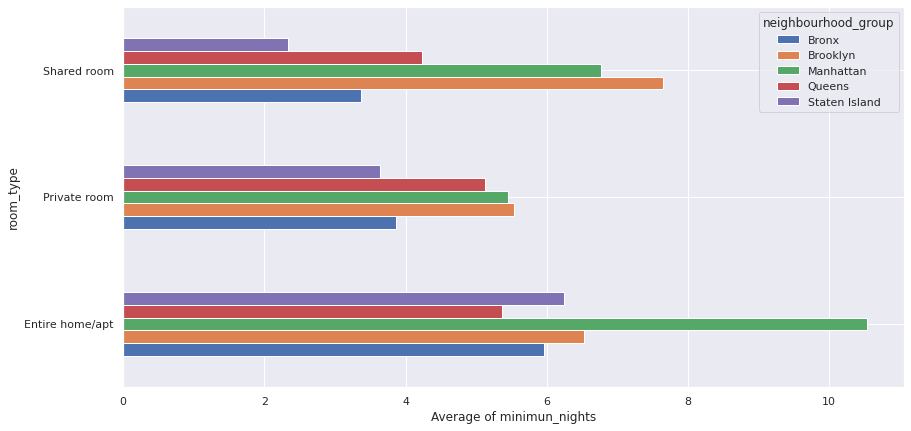

In [33]:
df.groupby(['room_type','neighbourhood_group'])['minimum_nights'].mean().unstack().plot.barh()
plt.xlabel('Average of minimun_nights')

**It seems like half the listings renting out Entire houses and apartments are from Manhattan only.**

**Private rooms are mostly preferred in other neighbourhood group**

# **How monthly reviews varies with room types in each neighbourhood groups?**

Text(0, 0.5, 'Average of number_of_reviews')

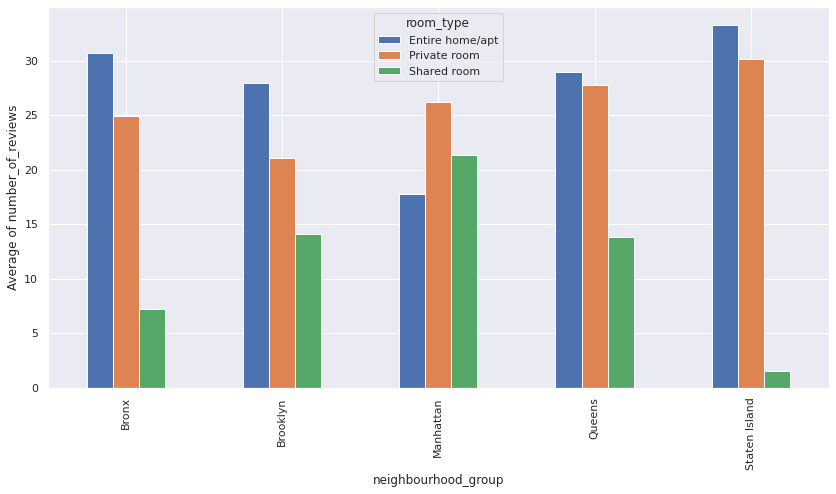

In [34]:
df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].mean().unstack().plot.bar()
plt.ylabel('Average of number_of_reviews')

In [35]:
df['number_of_reviews'].value_counts()

0      10051
1       5243
2       3464
3       2519
4       1994
       ...  
313        1
540        1
480        1
326        1
341        1
Name: number_of_reviews, Length: 394, dtype: int64

In [36]:
df['number_of_reviews'].describe()

count    48884.000000
mean        23.271991
std         44.551331
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

**Approx 10K properties on airbnb do not have review.
Maximum review one of the property recieved is 629.
On an average no of reviews recieved are 23.**

# **Top 10 reviewed hosts on the basis of reviews/month?**

In [37]:
# Case 1
df.groupby(['host_id','host_name'])['reviews_per_month'].max().sort_values(ascending=False)

host_id    host_name
244361589  Row NYC      58.50
228415932  Louann       20.94
156684502  Nalicia      19.75
26432133   Danielle     16.22
217379941  Brent        15.78
                        ...  
39695769   Avra          0.00
39706334   Erin          0.00
39724060   Jaime         0.00
39731713   Polina        0.00
274321313  Kat           0.00
Name: reviews_per_month, Length: 37455, dtype: float64

In [38]:
# Case 2
df.groupby(['host_name'])['reviews_per_month'].sum().sort_values(ascending=False)

host_name
David           508.61
Michael         475.82
Alex            443.44
Sonder (NYC)    397.56
John            321.02
                 ...  
Marné             0.00
Brijette          0.00
Shu-Fen           0.00
Marquita          0.00
현선                0.00
Name: reviews_per_month, Length: 11451, dtype: float64

In [39]:
df.groupby(['host_id','host_name'])['reviews_per_month'].max().sort_values(ascending=False).head(10)

host_id    host_name
244361589  Row NYC      58.50
228415932  Louann       20.94
156684502  Nalicia      19.75
26432133   Danielle     16.22
217379941  Brent        15.78
232251881  Lakshmee     15.32
47621202   Dona         14.58
266992480  Sam          14.00
259630588  Alina        14.00
55125246   Yvonne       13.48
Name: reviews_per_month, dtype: float64

**Host id 244361589 (Row NYC) listed or booked was 58.50 which is is highest followed by the others .**

Text(0.5, 0, 'Maximum of reviews_per_month')

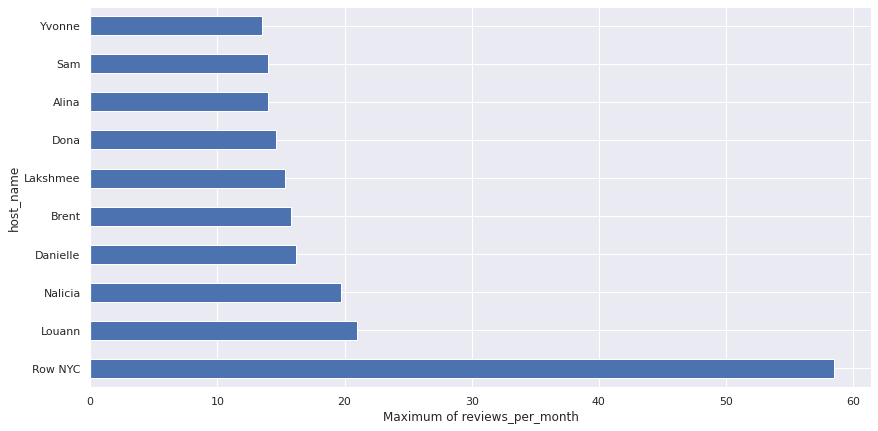

In [40]:
df.groupby(['host_name'])['reviews_per_month'].max().sort_values(ascending=False).head(10).plot.barh()
plt.xlabel('Maximum of reviews_per_month')

**Row NYC is the most reviewed host with 50+ reviews.**

# **Room Types and their relation with availability in different neighbourhood groups?**

In [41]:
df['availability_365'].value_counts()

0      17530
365     1295
364      491
1        408
89       361
       ...  
195       26
183       24
196       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

In [42]:
df[df['availability_365']==365].describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.295000e+03,1295.000000,1295.000000,1295.000000,1295.00000,1295.000000,1295.000000,1295.000000,1295.0
mean,8.554698e+07,40.729014,-73.943275,250.769884,19.60000,10.220849,0.540672,13.158301,365.0
std,8.786960e+07,0.057781,0.059799,550.497373,65.05093,22.095983,0.980481,36.224171,0.0
min,2.787000e+03,40.507080,-74.242850,20.000000,1.00000,0.000000,0.000000,1.000000,365.0
25%,8.931349e+06,40.687990,-73.983210,72.000000,1.00000,0.000000,0.000000,1.000000,365.0
50%,4.634351e+07,40.730990,-73.954270,125.000000,3.00000,2.000000,0.120000,2.000000,365.0
75%,1.565055e+08,40.762095,-73.921715,225.000000,30.00000,10.000000,0.630000,7.000000,365.0
max,2.733930e+08,40.893740,-73.721730,9999.000000,1250.00000,183.000000,8.940000,327.000000,365.0


**Property available for 365 days have price maximum of 1250.
Average price is 250.
 no of review on a average is 10.**

In [43]:
df.groupby(['room_type','neighbourhood_group']).agg({'availability_365':['median','mean']})

availability_365            
                                              median        mean
room_type       neighbourhood_group                             
Entire home/apt Bronx                          131.0  158.000000
                Brooklyn                        28.0   97.207679
                Manhattan                       42.0  117.149871
                Queens                          89.0  132.267176
                Staten Island                  176.5  178.073864
Private room    Bronx                          158.0  171.399386
                Brooklyn                        24.0   99.912206
                Manhattan                       29.0  101.845026
                Queens                         108.0  149.222716
                Staten Island                  282.0  226.361702
Shared room     Bronx                           89.0  154.216667
                Brooklyn                       156.0  177.725061
                Manhattan                       81.0  138.572917
                Queens                         175.5  192.186869
                Staten Island                   37.0   64.777778

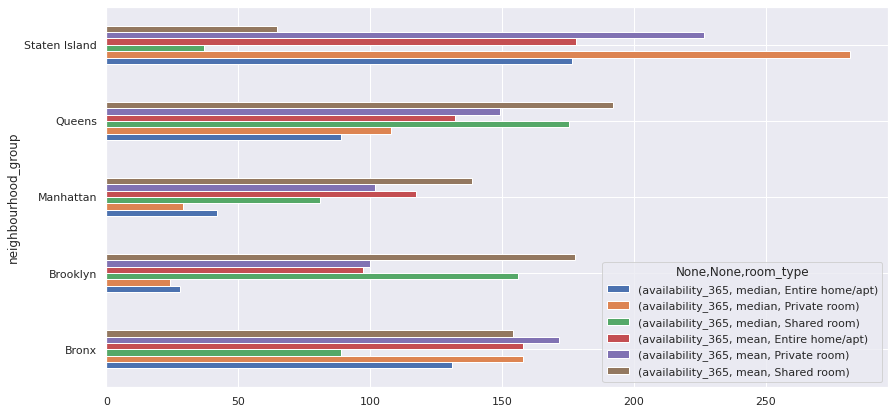

In [44]:
df.groupby(['room_type','neighbourhood_group']).agg({'availability_365':['median','mean']}).unstack(0).plot.barh()

**Entire houses and apartments are expensive in every neighbourhood group.**

**Brooklyn and Queens have approx similar price ranges for Private and Shared rooms.**

**The Bronx and Staten Island have a similar type of price range for each room type.**

# **What can we learn about different hosts and areas?**

In [45]:
df['total_cost'] = df['price']  * df['minimum_nights']
df.groupby(['host_id']).sum('total_cost').sort_values(by = 'total_cost',ascending=False).head(5)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,total_cost
host_id,,,,,,,,,
107434423,9451.60418,-17166.13165,70331,7470,29,6.04,53824,58884,2258580
271248669,40.71206,-74.00999,6500,180,0,0.00,1,365,1170000
30283594,4931.41347,-8952.50779,33581,3767,65,3.94,14641,37924,1164243
20582832,40.76810,-73.91651,10000,100,2,0.04,1,0,1000000
3906464,40.71355,-73.98507,9999,99,6,0.14,1,83,989901


In [46]:
df[['neighbourhood','host_name','host_id','total_cost']].groupby(['neighbourhood','host_id']).sum('total_cost').sort_values(by = 'total_cost',ascending=True).head(5)


,,total_cost
neighbourhood,host_id,
Williamsburg,110049861,10
Greenpoint,11967922,10
Harlem,33511962,10
Sunset Park,167570251,10
Highbridge,205820814,10


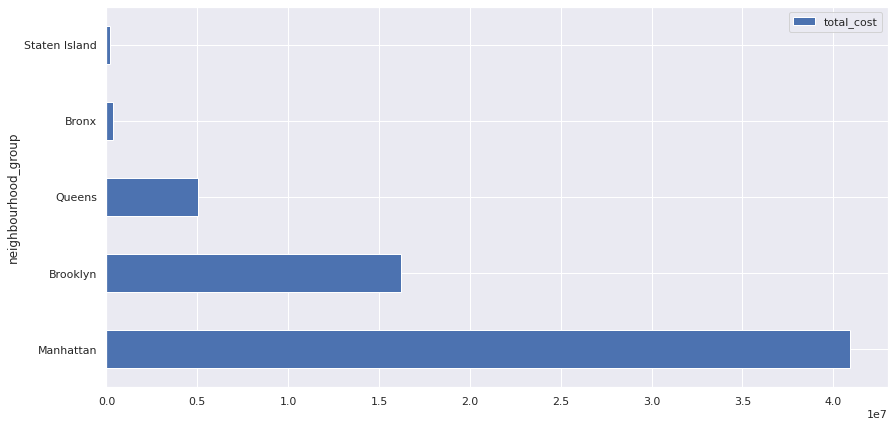

In [47]:
#which neighbourhood_group can make most money 
df[['neighbourhood_group','total_cost']].groupby(['neighbourhood_group']).sum('total_cost').sort_values(by = 'total_cost',ascending=False).head(5).plot(kind = 'barh')


In [48]:
df[['neighbourhood','total_cost']].groupby(['neighbourhood']).sum('total_cost').sort_values(by = 'total_cost',ascending=False).head(20) 


,total_cost
neighbourhood,
Midtown,4797807
Upper West Side,4469070
Williamsburg,3926160
Hell's Kitchen,3757457
Upper East Side,2914718
East Village,2643097
Chelsea,2517264
Bedford-Stuyvesant,2468039
Harlem,2186254


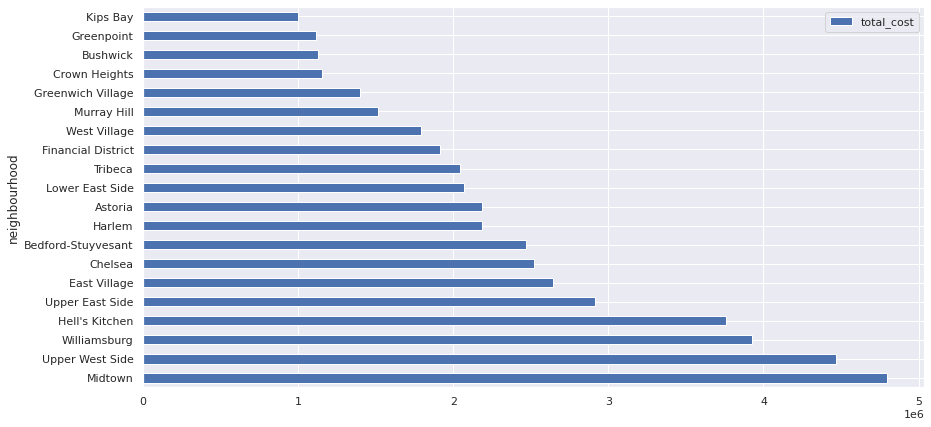

In [49]:
#which neighbourhood  make most money 
df[['neighbourhood','total_cost']].groupby(['neighbourhood']).sum('total_cost').sort_values(by = 'total_cost',ascending=False).head(20).plot(kind = 'barh')
plt.rcParams["figure.figsize"] = (14,10)

**Midtown is the most popularand expensive neighbouhood which makes more money.**

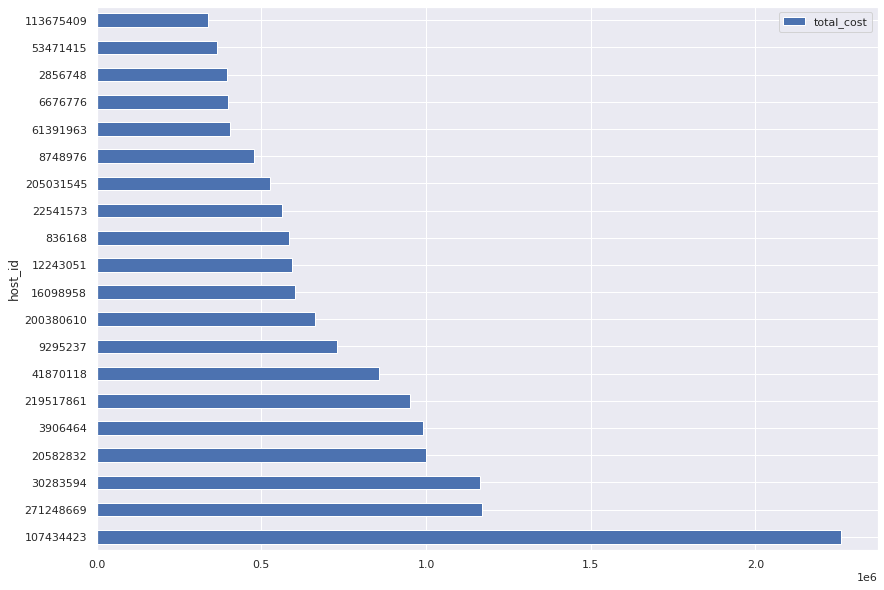

In [50]:
#which host_id can make most money 
df[['host_id','total_cost']].groupby(['host_id']).sum('total_cost').sort_values(by = 'total_cost',ascending=False).head(20).plot(kind = 'barh')
plt.rcParams["figure.figsize"] = (13,10)

**Among all Host id 107434423 earn more money.**

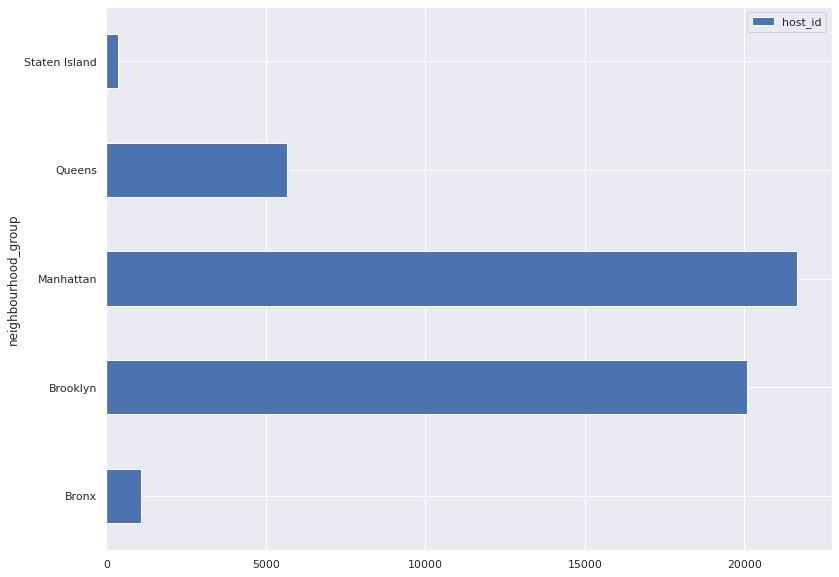

In [51]:
#where host prefer most
df[['neighbourhood_group','host_id']].groupby('neighbourhood_group').count().plot(kind = 'barh')



**Host from the Manhattan city mostly preferred.**